<a href="https://colab.research.google.com/github/lalitpandey02/Bamboo-Weekly-by-Reuven-Lerner/blob/main/BW_5_Ukrainian_Exports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


One year ago, Russia invaded Ukraine. The war continues to rage, and we’ve seen no small number of horrific and devastating pictures. Millions of Ukrainians are now refugees, trying to make a new (often temporary) life elsewhere.
Soon after the invasion, a number of commentators pointed to Ukraine’s importance as an exporter of food products. If they cannot export food to the rest of the world, then it’ll obviously be an issue for Ukrainian farmers, and for their economy. But it might also lead to a food shortage for millions of people in other countries.
In response to this problem, a number of countries negotiated the Black Sea Grain Initiative, aimed at helping Ukraine export food products across the Black Sea to Turkey, Mediterranean countries, and elsewhere. The program has been a success; as of earlier this month, more than 700 ships carrying food had left Ukraine.
This week, we’ll look at a data set describing the ships that have left Ukraine as part of this initiative.
The data set comes from humdata.org, which has a variety of humanitarian-related data sets. In particular, we’ll be looking at data from their page on the Black Sea Grain Initiative’s ship movements, at https://data.humdata.org/dataset/black-sea-grain-initiative-vessel-movements. I suggest downloading the data in Excel format, which includes a data dictionary on the “Readme” sheet, and the actual data we’ll use on the “Data” sheet.
The URL to download the data in Excel format is:
https://docs.google.com/spreadsheets/d/e/2PACX-1vRisnQjodySbp6-XXPGhdsVMp2stg_gyuxw42pP41tuxeic63IARau6bV1TgjLiw_ciAWsTO5LarPqT/pub?output=xlsx

### Objective
Here is what I would like for you to do:
1. Read the Excel data into a data frame. Again, the “Data” sheet is what interests us.

2. Create a pivot table, showing how many tons of each commodity (rows) have left each port (columns).

3. Create a pivot table, showing how many tons of each commodity (columns) were going to each destination country (rows).

4. The worry was that lower-income countries would not have enough food to eat, because of the war. According to the data's "income group," what proportion of the grain are low-income countries receiving?

5. Have we seen growth in the total tonnage shipped each month to developing countries?

6. Finally, what 10 flags are most commonly used on the ships coming from Ukraine? Do any country's names appear more than once? If so, why, and how can you fix it?




The learning goals for this week are to work with pivot tables, calculate growth, and clean some weird data.

# New Section

In [61]:
#imports
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
print("Import complete")

Import complete


#### 1. Read the Excel data into a data frame

In [62]:
# Extract Data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRisnQjodySbp6-XXPGhdsVMp2stg_gyuxw42pP41tuxeic63IARau6bV1TgjLiw_ciAWsTO5LarPqT/pub?output=xlsx"
xls_file, _ = urlretrieve(url)

In [63]:
#Read Excel
df = pd.read_excel(xls_file, sheet_name = "Data")
df.head()

,Status,Outbound Sequence,Vessel name,IMO,Departure port,Country,Commodity,Tonnage,Departure,Inspection İstanbul,Income group,Flag,World Bank region,UN region,Development category,WFP
0,Outbound,949,MASTRO MITROS,9228071,Odesa,Egypt,Corn,32611.0,2023-05-13 23:00:00,NaT,lower-middle income,Liberia,Middle East & North Africa,Africa,developing,NaN
1,Outbound +,949,MASTRO MITROS,9228071,Odesa,Egypt,Soya beans,8704.0,2023-05-13 23:00:00,NaT,lower-middle income,Liberia,Middle East & North Africa,Africa,developing,NaN
2,Outbound,948,DENIZ M (WFP),9450703,Odesa,Sudan,Wheat,30000.0,2023-05-13 23:00:00,NaT,low-income,Panama,Sub-Saharan Africa,Africa,developing,WFP
3,Outbound,947,PACIFIC ROSE,9299460,Chornomorsk,Türkiye,Wheat,26250.0,2023-05-11 23:00:00,NaT,upper-middle-income,Barbados,Europe & Central Asia,Asia-Pacific,developing,NaN
4,Outbound,946,NAVIOS HOPE,9328558,Odesa,China,Barley,62000.0,2023-05-11 23:00:00,NaT,upper-middle-income,Panama,East Asia & Pacific,Asia-Pacific,developing,NaN


In [64]:
df.shape

(1082, 16)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Status                1082 non-null   object        
 1   Outbound Sequence     1082 non-null   int64         
 2   Vessel name           1082 non-null   object        
 3   IMO                   1082 non-null   int64         
 4   Departure port        1082 non-null   object        
 5   Country               1082 non-null   object        
 6   Commodity             1082 non-null   object        
 7   Tonnage               1082 non-null   float64       
 8   Departure             1082 non-null   datetime64[ns]
 9   Inspection İstanbul   1066 non-null   datetime64[ns]
 10  Income group          1082 non-null   object        
 11  Flag                  1081 non-null   object        
 12  World Bank region     1082 non-null   object        
 13  UN region         

In [66]:
df.describe()

,Outbound Sequence,IMO,Tonnage
count,1082.000000,1.082000e+03,1082.000000
mean,480.280037,9.300725e+06,27884.091497
std,274.913351,3.392154e+05,20193.514864
min,1.000000,7.126102e+06,67.860000
25%,237.250000,9.184938e+06,9601.000000
50%,483.500000,9.311258e+06,26000.000000
75%,719.000000,9.515656e+06,41950.000000
max,949.000000,9.942627e+06,74904.000000


#### **Column Values Analysis**

In [67]:
df.Status.unique()

array(['Outbound', 'Outbound +'], dtype=object)

In [68]:
df['Departure port'].unique()

array(['Odesa', 'Chornomorsk', 'Yuzhny/Pivdennyi'], dtype=object)

In [69]:
df.Country.unique()

array(['Egypt', 'Sudan', 'Türkiye', 'China', 'Spain', 'Bangladesh',
       'Tunisia', 'Morocco', 'The Netherlands', 'Libya', 'Kenya',
       'Ethiopia', 'Italy', 'Lebanon', 'Germany', 'Yemen', 'India',
       'Portugal', 'Iraq', 'Israel', 'Viet Nam', 'Algeria',
       'United Kingdom', 'United Arab Emirates', 'Saudi Arabia',
       'Belgium', 'Japan', 'France', 'Romania', 'Bulgaria', 'Afghanistan',
       'Ireland', 'Sri Lanka', 'Thailand', 'Greece', 'Indonesia',
       'Somalia', 'Republic of Korea', 'Jordan', 'Oman', 'Pakistan',
       'Djibouti', 'Georgia', 'Malaysia', 'Iran'], dtype=object)

In [70]:
df.Commodity.unique()

array(['Corn', 'Soya beans', 'Wheat', 'Barley', 'Sunflower meal',
       'Sunflower oil', 'Sunflower meal ', 'Peas', 'Rapeseed',
       'Sunflower seed', 'Vegetable oil', 'Soya oil', 'Canola',
       'Rapeseed meal', 'Sunflower pellets', 'Mixed',
       'Wheat bran pellets', 'Sugar beet pellets'], dtype=object)

In [71]:
print("Skewness = " , df.Tonnage.skew())
print("Kurtosis = " , df.Tonnage.kurtosis())

Skewness =  0.619311874824226
Kurtosis =  -0.7292175709852051


Text(0.5, 1.0, 'Histogram and KDE of Tons Commodities sent')

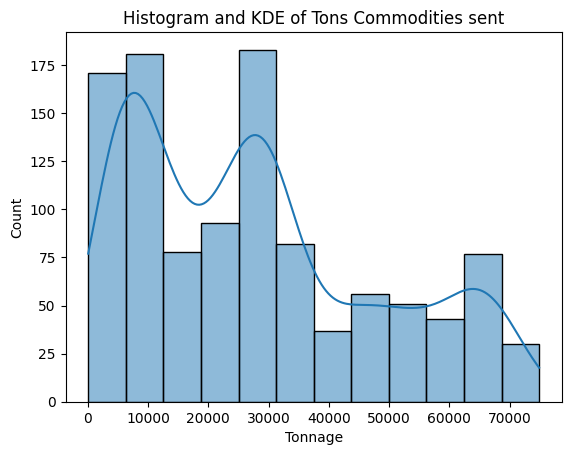

In [72]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="Tonnage", kde="True")
ax.set_title("Histogram and KDE of Tons Commodities sent")

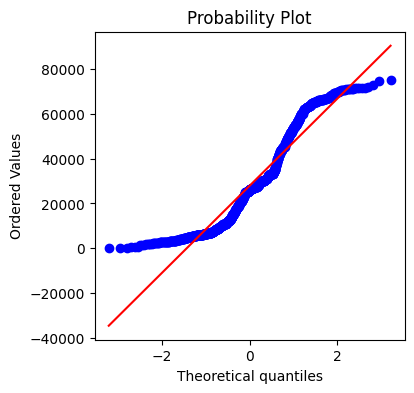

In [73]:
from scipy import stats
fig, (ax) = plt.subplots(figsize = (4,4))
res = stats.probplot(df["Tonnage"],dist="norm", plot=ax)

In [74]:
df["Departure"].describe(datetime_is_numeric=True)

count                             1082
mean     2022-12-05 21:21:44.251386368
min                2022-07-31 23:00:00
25%                2022-09-28 23:00:00
50%                2022-11-20 10:00:00
75%                2023-02-07 22:00:00
max                2023-05-13 23:00:00
Name: Departure, dtype: object

In [75]:
print("Departure Date Range : ", df["Departure"].dt.date.min(), " to ", df["Departure"].dt.date.max())

Departure Date Range :  2022-07-31  to  2023-05-13


In [76]:
df[df["Inspection İstanbul"].isna()]

,Status,Outbound Sequence,Vessel name,IMO,Departure port,Country,Commodity,Tonnage,Departure,Inspection İstanbul,Income group,Flag,World Bank region,UN region,Development category,WFP
0,Outbound,949,MASTRO MITROS,9228071,Odesa,Egypt,Corn,32611.0,2023-05-13 23:00:00,NaT,lower-middle income,Liberia,Middle East & North Africa,Africa,developing,NaN
1,Outbound +,949,MASTRO MITROS,9228071,Odesa,Egypt,Soya beans,8704.0,2023-05-13 23:00:00,NaT,lower-middle income,Liberia,Middle East & North Africa,Africa,developing,NaN
2,Outbound,948,DENIZ M (WFP),9450703,Odesa,Sudan,Wheat,30000.0,2023-05-13 23:00:00,NaT,low-income,Panama,Sub-Saharan Africa,Africa,developing,WFP
3,Outbound,947,PACIFIC ROSE,9299460,Chornomorsk,Türkiye,Wheat,26250.0,2023-05-11 23:00:00,NaT,upper-middle-income,Barbados,Europe & Central Asia,Asia-Pacific,developing,NaN
4,Outbound,946,NAVIOS HOPE,9328558,Odesa,China,Barley,62000.0,2023-05-11 23:00:00,NaT,upper-middle-income,Panama,East Asia & Pacific,Asia-Pacific,developing,NaN
5,Outbound,945,QUEEN LILA,9303376,Yuzhny/Pivdennyi,Egypt,Corn,30450.0,2023-05-10 23:00:00,NaT,lower-middle income,Belize,Middle East & North Africa,Africa,developing,NaN
6,Outbound,944,MARIA,9041772,Odesa,Spain,Wheat,20900.0,2023-05-10 23:00:00,NaT,high-income,Palau,Europe & Central Asia,Western Europe and Others,developed,NaN
7,Outbound,943,AG VALOR,9312327,Odesa,Egypt,Corn,10351.0,2023-05-10 23:00:00,NaT,lower-middle income,Panama,Middle East & North Africa,Africa,developing,NaN
8,Outbound +,943,AG VALOR,9312327,Odesa,Egypt,Wheat,15999.0,2023-05-10 23:00:00,NaT,lower-middle income,Panama,Middle East & North Africa,Africa,developing,NaN
9,Outbound,942,LADY ZEHMA,9303431,Chornomorsk,Egypt,Corn,19350.0,2023-05-09 23:00:00,NaT,lower-middle income,Panama,Middle East & North Africa,Africa,developing,NaN


In [77]:
df["Inspection İstanbul"].isna().sum()

16

In [78]:
df[df["Inspection İstanbul"].isna()].Departure.dt.date

0     2023-05-13
1     2023-05-13
2     2023-05-13
3     2023-05-11
4     2023-05-11
5     2023-05-10
6     2023-05-10
7     2023-05-10
8     2023-05-10
9     2023-05-09
10    2023-05-09
11    2023-05-09
12    2023-05-08
15    2023-05-07
16    2023-05-07
17    2023-05-05
Name: Departure, dtype: object

In [79]:
df[df["Inspection İstanbul"].isna()].Departure.dt.date.unique()

array([datetime.date(2023, 5, 13), datetime.date(2023, 5, 11),
       datetime.date(2023, 5, 10), datetime.date(2023, 5, 9),
       datetime.date(2023, 5, 8), datetime.date(2023, 5, 7),
       datetime.date(2023, 5, 5)], dtype=object)

In [80]:
# This Field Inspection İstanbul is not required and can be dropped 
# df.drop(columns="Inspection İstanbul", inplace=True)

In [81]:
df["Income group"].unique()

array(['lower-middle income', 'low-income', 'upper-middle-income',
       'high-income'], dtype=object)

In [82]:
print(df.Flag.nunique())
df["Flag"].unique()

45


array(['Liberia', 'Panama', 'Barbados', 'Belize', 'Palau', 'India',
       'Egypt', 'Marshall Islands', 'St. Kitts and Nevis', 'St. Vincent',
       'Malta', 'Norway', 'Türkiye', 'Greece', 'Singapore', 'China',
       'Hong-Kong', 'Sierra Leone', 'Comoros', 'Bahamas', 'Lebanon',
       'Niue', 'Turkey', 'Cook Islands', 'St Vincent', 'Guinea-Bissau',
       'Turkiye', 'Hong Kong', 'Togo',
       'St. Vincent and the\xa0Grenadines', 'Cayman Islands', 'Beliza',
       'Tuvalu', 'Marshall\xa0Islands', 'Vanuatu', 'St. Kitts and Navis',
       'Ukraine', 'Honduras', 'Portugal', 'Croatia', 'Thailand',
       'Tanzania', 'Cameroon', 'Equatorial Guinea', 'Bulgaria', nan],
      dtype=object)

In [83]:
df["World Bank region"].unique()

array(['Middle East & North Africa', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'East Asia & Pacific', 'South Asia'],
      dtype=object)

In [84]:
df['UN region'].unique()

array(['Africa', 'Asia-Pacific', 'Western Europe and Others',
       'Eastern Europe'], dtype=object)

In [85]:
df["Development category"].value_counts()

developing    599
developed     483
Name: Development category, dtype: int64

In [86]:
df.groupby(["Development category","World Bank region"])[["World Bank region"]].count()

World Bank region
Development category World Bank region                            
developed            East Asia & Pacific                         7
                     Europe & Central Asia                     452
                     Middle East & North Africa                 24
developing           East Asia & Pacific                       150
                     Europe & Central Asia                     222
                     Middle East & North Africa                162
                     South Asia                                 43
                     Sub-Saharan Africa                         22

In [87]:
df['WFP'].value_counts()

WFP    26
Name: WFP, dtype: int64

#### 2. How many tons of each commodity (rows) have left each port (columns)

In [88]:
# Include only grains 
col_grains = ["Corn","Wheat", "Barley"]
df_ = df.loc[df["Commodity"].isin(col_grains)]
df_

,Status,Outbound Sequence,Vessel name,IMO,Departure port,Country,Commodity,Tonnage,Departure,Inspection İstanbul,Income group,Flag,World Bank region,UN region,Development category,WFP
0,Outbound,949,MASTRO MITROS,9228071,Odesa,Egypt,Corn,32611.0,2023-05-13 23:00:00,NaT,lower-middle income,Liberia,Middle East & North Africa,Africa,developing,NaN
2,Outbound,948,DENIZ M (WFP),9450703,Odesa,Sudan,Wheat,30000.0,2023-05-13 23:00:00,NaT,low-income,Panama,Sub-Saharan Africa,Africa,developing,WFP
3,Outbound,947,PACIFIC ROSE,9299460,Chornomorsk,Türkiye,Wheat,26250.0,2023-05-11 23:00:00,NaT,upper-middle-income,Barbados,Europe & Central Asia,Asia-Pacific,developing,NaN
4,Outbound,946,NAVIOS HOPE,9328558,Odesa,China,Barley,62000.0,2023-05-11 23:00:00,NaT,upper-middle-income,Panama,East Asia & Pacific,Asia-Pacific,developing,NaN
5,Outbound,945,QUEEN LILA,9303376,Yuzhny/Pivdennyi,Egypt,Corn,30450.0,2023-05-10 23:00:00,NaT,lower-middle income,Belize,Middle East & North Africa,Africa,developing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,Outbound,4,POLARNET,9758961,Chornomorsk,Türkiye,Corn,12000.0,2022-08-04 23:00:00,2022-08-06 23:00:00,upper-middle-income,Türkiye,Europe & Central Asia,Asia-Pacific,developing,NaN
1078,Outbound,3,ROJEN,9754927,Chornomorsk,Italy,Corn,13041.0,2022-08-04 23:00:00,2022-08-06 23:00:00,high-income,Malta,Europe & Central Asia,Western Europe and Others,developed,NaN
1079,Outbound,2,NAVI STAR,9590979,Odesa,Ireland,Corn,33000.0,2022-08-04 23:00:00,2022-08-05 23:00:00,high-income,Panama,Europe & Central Asia,Western Europe and Others,developed,NaN
1080,Outbound,1,RAZONI,9086526,Odesa,Türkiye,Corn,1527.0,2022-07-31 23:00:00,2022-08-02 23:00:00,upper-middle-income,Sierra Leone,Europe & Central Asia,Asia-Pacific,developing,NaN


In [94]:
# Check number of unique items
df[["Commodity"]].value_counts()

Commodity         
Corn                  411
Wheat                 299
Sunflower oil         108
Sunflower meal         67
Barley                 64
Soya beans             58
Rapeseed               29
Sunflower seed         21
Peas                   10
Rapeseed meal           3
Canola                  3
Soya oil                2
Sunflower pellets       2
Vegetable oil           1
Sugar beet pellets      1
Sunflower meal          1
Mixed                   1
Wheat bran pellets      1
dtype: int64

In [100]:
# Create a pivot table, showing how many tons of each commodity (rows) have left each port (columns)

df_depart = pd.pivot_table(df_,values = "Tonnage",columns=["Departure port", "Commodity"], aggfunc="sum").stack()
df_depart

Departure port     Chornomorsk      Odesa  Yuzhny/Pivdennyi
        Commodity                                          
Tonnage Barley       280891.00   598704.0         369203.36
        Corn        5495186.99  4040554.0        5632759.00
        Wheat       2756269.00  3159459.0        2430923.00